In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import altair as alt

In [8]:
df = pd.read_csv('excess-mortality-raw-death-count.csv')
df['Entity'].unique()

array(['Albania', 'Andorra', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Belarus', 'Belgium', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Denmark', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Finland',
       'France', 'French Guiana', 'French Polynesia', 'Georgia',
       'Germany', 'Gibraltar', 'Greece', 'Greenland', 'Guadeloupe',
       'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kyrgyzstan',
       'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Macao', 'Malaysia', 'Malta', 'Martinique', 'Mauritius', 'Mayotte',
       'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro',
       'Netherlands', 'New Zealand', 'Nicaragua', 'North Macedonia',
       'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal',

In [3]:
df = df[df['Entity'] == 'United Kingdom']
df.head()

,Entity,Code,Day,average_deaths_2015_2019_all_ages,deaths_2020_all_ages,deaths_2015_all_ages,deaths_2016_all_ages,deaths_2017_all_ages,deaths_2018_all_ages,deaths_2019_all_ages,deaths_2021_all_ages,Population
3083,United Kingdom,GBR,2020-01-05,13803.6,13767.0,13430.0,14860.0,13608.0,14699.0,12421.0,20039.0,67530000
3084,United Kingdom,GBR,2020-01-12,15781.0,16018.0,18317.0,13149.0,15526.0,17429.0,14484.0,20035.0,67530000
3085,United Kingdom,GBR,2020-01-19,14983.0,14723.0,16735.0,13056.0,15230.0,16351.0,13543.0,20709.0,67530000
3086,United Kingdom,GBR,2020-01-26,14455.2,13426.0,15710.0,12853.0,14461.0,15970.0,13282.0,20489.0,67530000
3087,United Kingdom,GBR,2020-02-02,13836.2,13123.0,14559.0,12556.0,14184.0,15084.0,12798.0,19160.0,67530000


<AxesSubplot:xlabel='Day', ylabel='deaths_2020_all_ages'>

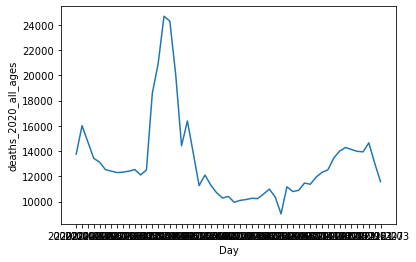

In [5]:
sns.lineplot(data=df, x='Day', y='deaths_2020_all_ages')

In [6]:
df['cumulative_deaths_2020_all_ages'] = df['deaths_2020_all_ages'].cumsum()
df['cumulative_average_deaths_2015_2019_all_ages'] = df['average_deaths_2015_2019_all_ages'].cumsum()
df['cumulative_excess_death_2020'] = df['cumulative_deaths_2020_all_ages'] - df['cumulative_average_deaths_2015_2019_all_ages']
df.head()

,Entity,Code,Day,average_deaths_2015_2019_all_ages,deaths_2020_all_ages,deaths_2015_all_ages,deaths_2016_all_ages,deaths_2017_all_ages,deaths_2018_all_ages,deaths_2019_all_ages,deaths_2021_all_ages,cumulative_deaths_2020_all_ages,cumulative_average_deaths_2015_2019_all_ages,cumulative_excess_death_2020
3266,United Kingdom,GBR,2020-01-05,13803.6,13767.0,13430.0,14860.0,13608.0,14699.0,12421.0,20039.0,13767.0,13803.6,-36.6
3267,United Kingdom,GBR,2020-01-12,15781.0,16018.0,18317.0,13149.0,15526.0,17429.0,14484.0,20035.0,29785.0,29584.6,200.4
3268,United Kingdom,GBR,2020-01-19,14983.0,14723.0,16735.0,13056.0,15230.0,16351.0,13543.0,20709.0,44508.0,44567.6,-59.6
3269,United Kingdom,GBR,2020-01-26,14455.2,13426.0,15710.0,12853.0,14461.0,15970.0,13282.0,20489.0,57934.0,59022.8,-1088.8
3270,United Kingdom,GBR,2020-02-02,13836.2,13123.0,14559.0,12556.0,14184.0,15084.0,12798.0,19160.0,71057.0,72859.0,-1802.0


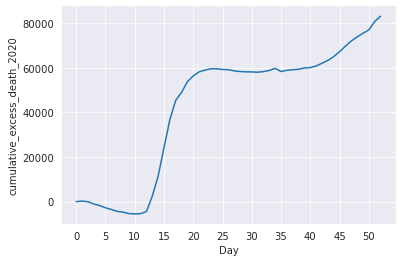

In [7]:
sns.set_style('darkgrid')
ax = sns.lineplot(data=df, x='Day', y='cumulative_excess_death_2020')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.despine()

In [45]:
df = pd.read_csv('excess-mortality-raw-death-count.csv')

In [46]:
df = df[df['Entity'].isin(['United Kingdom','United States','Spain','Germany','Italy'])]
df['cumulative_deaths_2020_all_ages'] = df['deaths_2020_all_ages'].cumsum()
df['cumulative_average_deaths_2015_2019_all_ages'] = df['average_deaths_2015_2019_all_ages'].cumsum()
df['cumulative_excess_death_2020'] = df['cumulative_deaths_2020_all_ages'] - df['cumulative_average_deaths_2015_2019_all_ages']
df['2020 cumulative excess death per million'] = 1e6 * df['cumulative_excess_death_2020'] / df['Population']

In [47]:
df['2020 cumulative excess death per million'].iloc[0]

0.0

In [48]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Day'], empty='none')

# The basic line
line = alt.Chart(df).mark_line(interpolate='basis').encode(
    x='Day',
    y='2020 cumulative excess death per million',
    color='Entity'
)


# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(df).mark_point().encode(
    x='Day',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'cumulative_excess_death_2020', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(df).mark_rule(color='gray').encode(
    x='Day',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=300
)


alt.LayerChart(...)

In [34]:
alt.themes.enable('default')

ThemeRegistry.enable('default')

In [17]:
alt.themes

ThemeRegistry(active='dark', registered=['dark', 'default', 'fivethirtyeight', 'ggplot2', 'latimes', 'none', 'opaque', 'quartz', 'urbaninstitute', 'vox'])